In [1]:
import numpy as np
from matplotlib import pyplot as plt

from warper import simulate_2d, simulate_1d

from multiprocessing import Pool

import os, pickle
from tqdm.notebook import tqdm

In [2]:
pool = Pool(10)

In [3]:
def get_RS(o0,g0,th,ka):

    mu = th * ka / (th+ka)
    S = th**2/ka**2/g0/2 * (g0*mu + o0**2 + ka**2)/(g0*mu + o0**2 + th**2)
    R = th**2/ka**2/g0/o0**2/2 * (g0*mu*(ka**2/th**2) + o0**2 + ka**2)/(g0*mu + o0**2 + th**2)
    return R,S

In [4]:
# params - o0,g0,th,ka

params = [(1,10,15,10),
          (1,10,10,15),
          (2,1,3,4),
          (10,11,10,1),
          (10,11,1,10),
          (10,11,1,1),
          (10,1,1,1),
          (10,1,11,12),
          (1,10,4,3),
          (1,2,3,4)]

In [16]:
R = [get_RS(*a)[0] for a in params]
S = [get_RS(*a)[1] for a in params]

In [23]:
N=1000000
warmup=0
dt=0.001
samples=100
skip=100
time = np.linspace(0,N//skip *dt, N//skip)

In [6]:
kwargs = [dict(x0=np.zeros(samples),v0=np.zeros(samples),
    N=N, samples=samples,
    dt=dt, warmup=warmup, skip=skip,
    omega0=o0,gamma0=g0,kappa=ka, theta=th) for o0,g0,th,ka in params]

In [9]:
results = []
for o0,g0,th,ka in tqdm(params):
    kwargs = dict(x0=np.zeros(samples),v0=np.zeros(samples),
        N=N, samples=samples,
        dt=dt, warmup=warmup, skip=skip,
        omega0=o0,gamma0=g0,kappa=ka, theta=th)
    results.append(simulate_1d(pool,10,**kwargs))

<ipython-input-9-6ce127125223>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for o0,g0,th,ka in tqdm(params):


In [11]:
results = np.array(results)

In [12]:
results.shape

(10, 4, 1000, 10000)

In [26]:
R_sample = results.var(axis=2)[:,0]
S_sample = results.var(axis=2)[:,1]

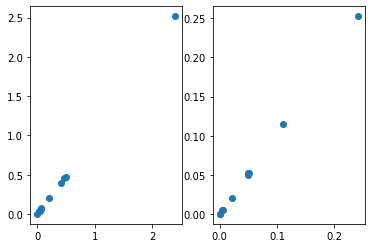

In [29]:
plt.subplot(121)
plt.scatter(S, S_sample[..., -1])
plt.subplot(122)
plt.scatter(R, R_sample[..., -1])

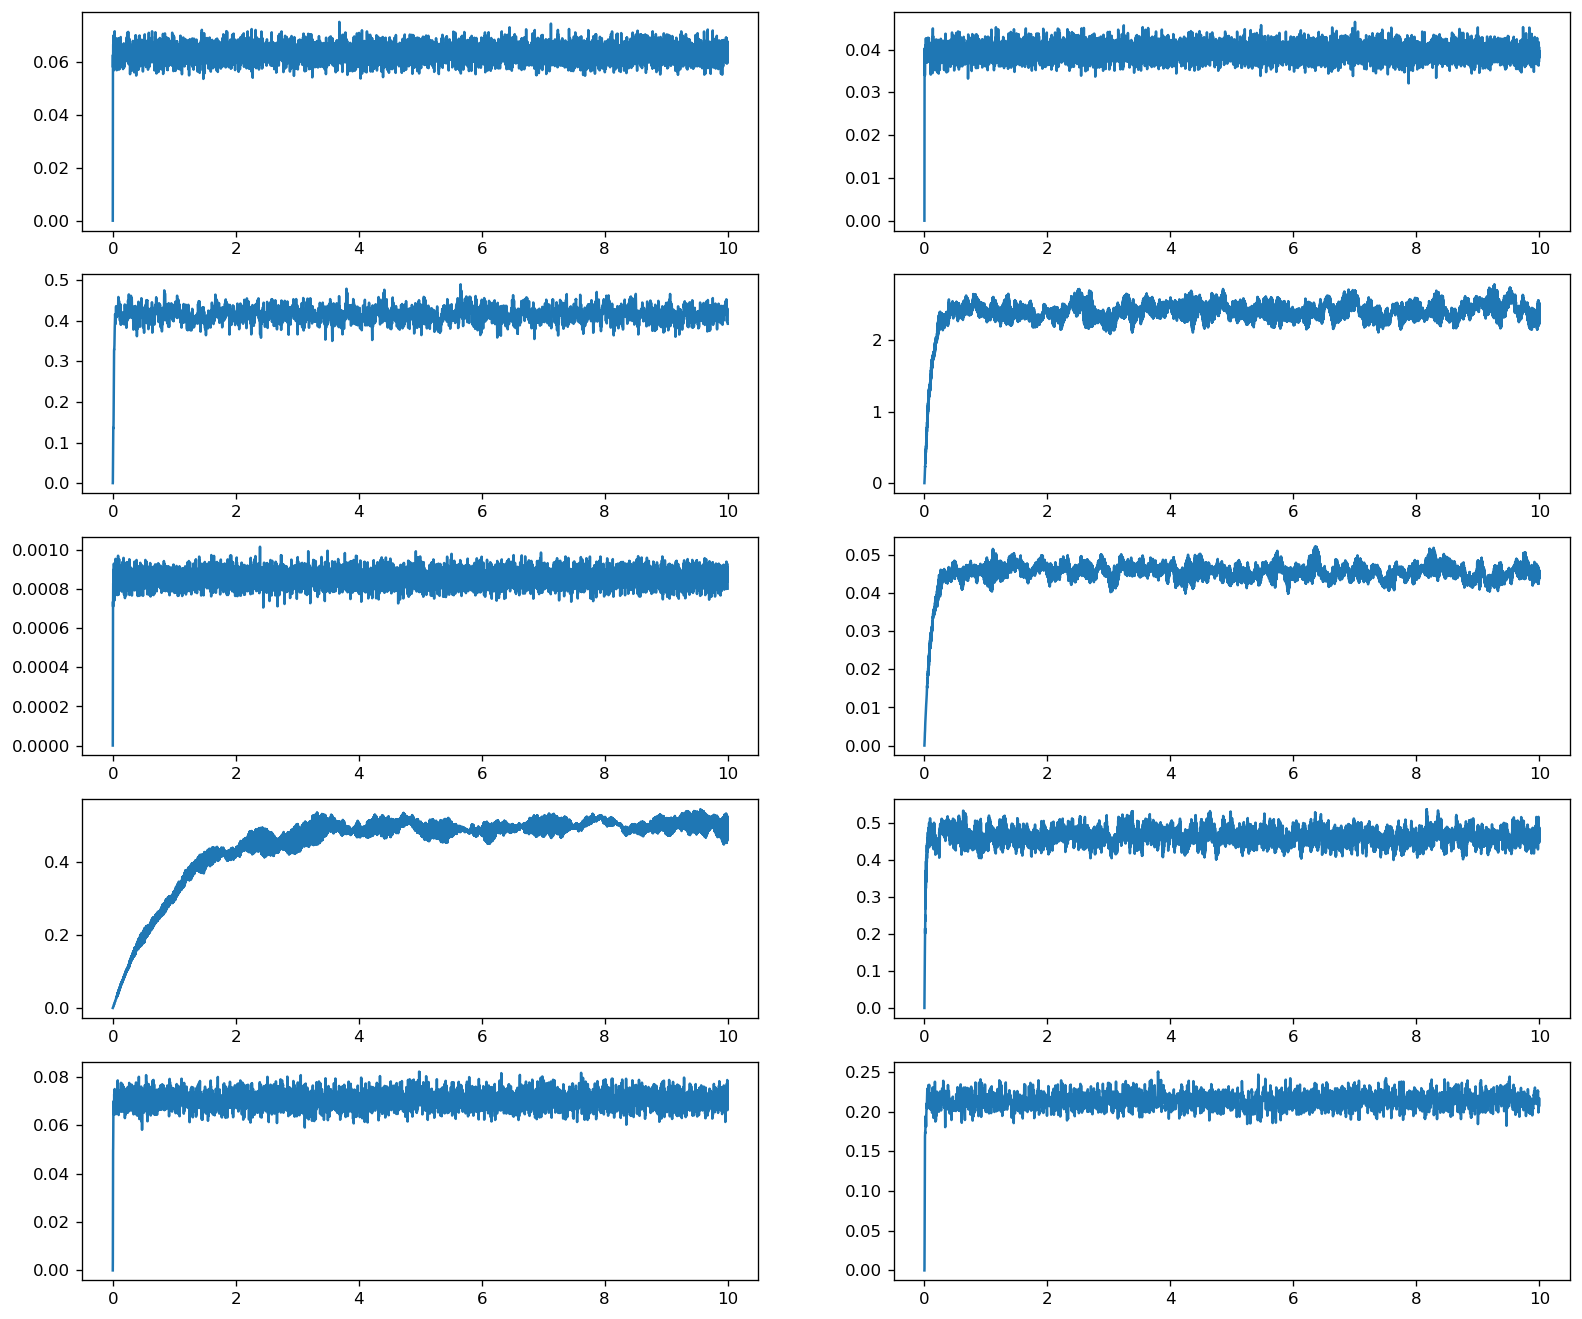

In [30]:
fig, axs = plt.subplots(T.shape[0]//2,2,figsize=(16,14),dpi=120)
for ax, xi in zip(axs.flatten(),T[:,:,:]):
    ax.plot(time, xi.var(axis=0))